# Mini Project : EDA

In [1]:
import pandas as pd # pandas module for "Data Manipulation"
import numpy as np # numpy module for "linear Algebra"
import matplotlib.pyplot as plt # module for "Plotting"
import seaborn as sns # second module for "Plotting"
from scipy import stats # module for removing outliers from data.


In [4]:
# Importing Data into the pandas dataframe.
df = pd.read_csv ('Data_miniproject.csv');

# Checking the Shape of the Data provided
df.shape
df

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
# Checking the Health of Data
df.all()

Cost       False
Weight      True
Weight1     True
Length      True
Height      True
Width       True
dtype: bool

**Data of all Columns looks good except Cost column**
<br/>
**This indicates that there is some unusual data/ data type in Cost column**

In [6]:
# Checking for nulls.
df.isnull().values.any()

False

**There are no Null values**

In [7]:
df.isna().any(axis=None)

False

**There are no NAN's in the data**
<br/>
**Now lets check for any  Zeros in "Cost" column and try and delete the Entry/ Data sample which has Zeros**

In [6]:
index = df[df.Cost == 0]
index


,Cost,Weight,Weight1,Length,Height,Width
40,0.0,19.0,20.5,22.8,6.4752,3.3516


In [11]:
# Data in Row 40 has Cost = 0. We will remove that row to clean our data
df = df[df.Cost != 0]

# Checking the health of data again 
df.all()


Cost       True
Weight     True
Weight1    True
Length     True
Height     True
Width      True
dtype: bool

**Now the data is good to use without any null values, nan's, zeros as df.all() is true.**
<br />
**Now We shall draw Histograms for all the features using Seaborn library.**

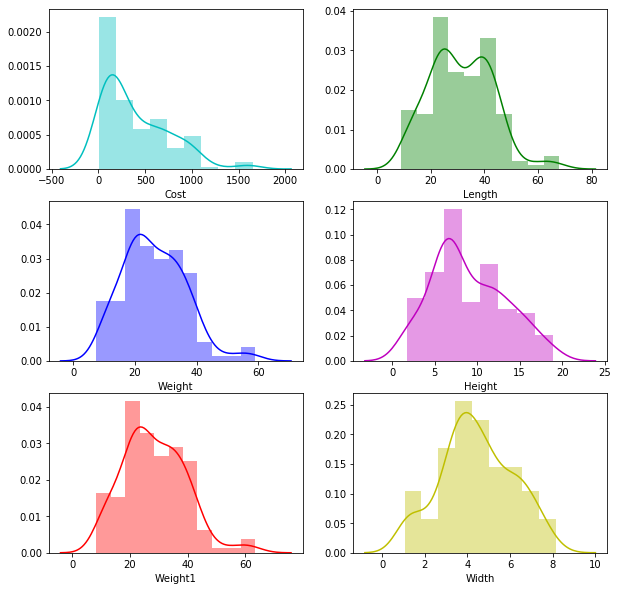

In [12]:
colors = ['c', 'b', 'r', 'g', 'm', 'y',]

# Defining the layout of plots  into 3 rows and 2 columns with each plot size of 10x10 .
# sharex=False represents that they don't share the common X axis.
f, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
for i, feature in enumerate(df.columns):
    # displot takes first argument as column name to represent the graph
    # color here is displayed using Array
    # ax specifies the plot block where it needs to get rendered.
    sns.distplot(df[feature] , color=colors[i], ax=axes[i%3, i//3])

Histograms are visual representation of data and help give an estimate as to where values are concentrated, what are the extremes and whether there are any gaps or unusual values. They are also useful in giving a rough view of the probability distribution.
Looking at the above Histograms, Max and Min Values, Preferred Values and their distribution can be casually understood.


## Checking for Outliers

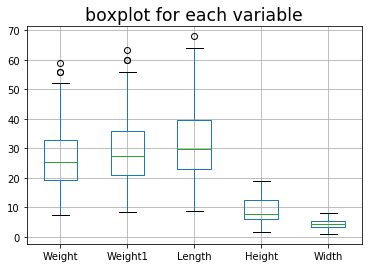

In [14]:
df.iloc[:, 1:].boxplot()
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

> Looking at the Above Graph , we clearly see that there are outliers in the data 
> Outliers are represented with small circles in the graph
> In the next step, we remove these outliers and plot the graph

> In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is > or < 3 or -3 respectively, i.e -3 < Z > 3 those data point will be identified as outliers

> We will use Z-score function defined in scipy library to detect the outliers

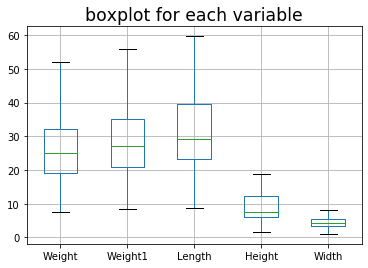

In [15]:
# Eliminating outliers using z-scores from Scipy Library.
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

df.iloc[:, 1:].boxplot()
plt.title("boxplot for each variable", fontsize = "xx-large")
plt.show()

In [16]:
df.shape

(155, 6)

> Now that the data is clear with minor outliers , we are good to go with this new data

## Finding Correlation

###### *Variables within a dataset can be related for lots of reasons.*

For example:
- One variable could be lightly associated with another variable.

- One variable could cause or depend on the values of another variable.

- Two variables could depend on a third known/ unknown variable.

##### *It is extremely useful in data analysis and modeling to understand the relationships between variables. The statistical relationship between two variables is referred to as their correlation.*

> We will now find the correlation between the variables using pandas' corr method

In [17]:
df.corr()

,Cost,Weight,Weight1,Length,Height,Width
Cost,1.000000,0.895740,0.899734,0.907373,0.801954,0.924029
Weight,0.895740,1.000000,0.999417,0.990580,0.675500,0.888883
Weight1,0.899734,0.999417,1.000000,0.993026,0.691166,0.895324
Length,0.907373,0.990580,0.993026,1.000000,0.755416,0.896793
Height,0.801954,0.675500,0.691166,0.755416,1.000000,0.800091
Width,0.924029,0.888883,0.895324,0.896793,0.800091,1.000000


**Notice how various variables are co related, the diagonal relation ship of variable with itself is always 1**
<br/>
**Now We will plot Heatmap for all the features using seaborn library.**

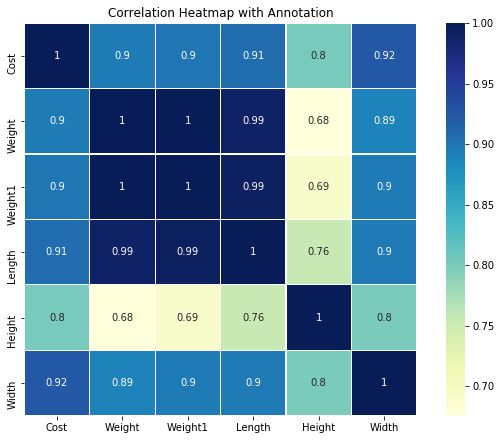

In [21]:
# taking the number of columns in a dataframe
n=df.shape[1]
# Defining the plot size 
fig, axs = plt.subplots(figsize = (8, 12))
# specifying some more attributes to adjust the heat map
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap with annotation
sns.heatmap(df.corr(), linewidths = 0.1, square = True, annot = True, cmap = "YlGnBu")
plt.ylim(n, 0)
plt.xlim(0, n)
plt.title("Correlation Heatmap with Annotation")
plt.show()

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

- Positive Correlation: Both variables change in the same direction. 
- Negative Correlation: Variables change in opposite directions.
- Neutral Correlation: No relationship among the variables. 

Looking at the heatmap above, the following observations can be made wrt Cost which is the feature which we are interested in:

. The relation between Cost and Height is 80%
. The relation between Cost and Weight is 90%
. The relation between Cost and Weight1 is 90%
. The relation between Cost and Length is 91%
. The relation between Cost and Width is 92%

**Evaluation Criteria**<br />
- +0.30. A weak uphill (positive) linear relationship
- +0.50. A moderate uphill (positive) relationship
- +0.70. A strong uphill (positive) linear relationship
- Exactly +1. A perfect uphill (positive) linear relationship

As from above heat map, all values are above +0.70 , hence almost every feature is in linear relationship to Cost (positively). Hence, we will consider all the featuers for implementation of the algorithms.